In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import pandas as pd
from scipy import stats
from sklearn import metrics
from os.path import dirname, join as pjoin
from sklearn.ensemble import IsolationForest
from sklearn.ensemble._iforest import _average_path_length 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import os
import datetime
import glob 

In [2]:

folder = 'xxx' 

df = pd.read_csv(folder + 'xxx.csv')

mean = df.groupby(['dataset','supervised_size'],as_index=False).mean()
std  = df.groupby(['dataset','supervised_size'],as_index=False).std()

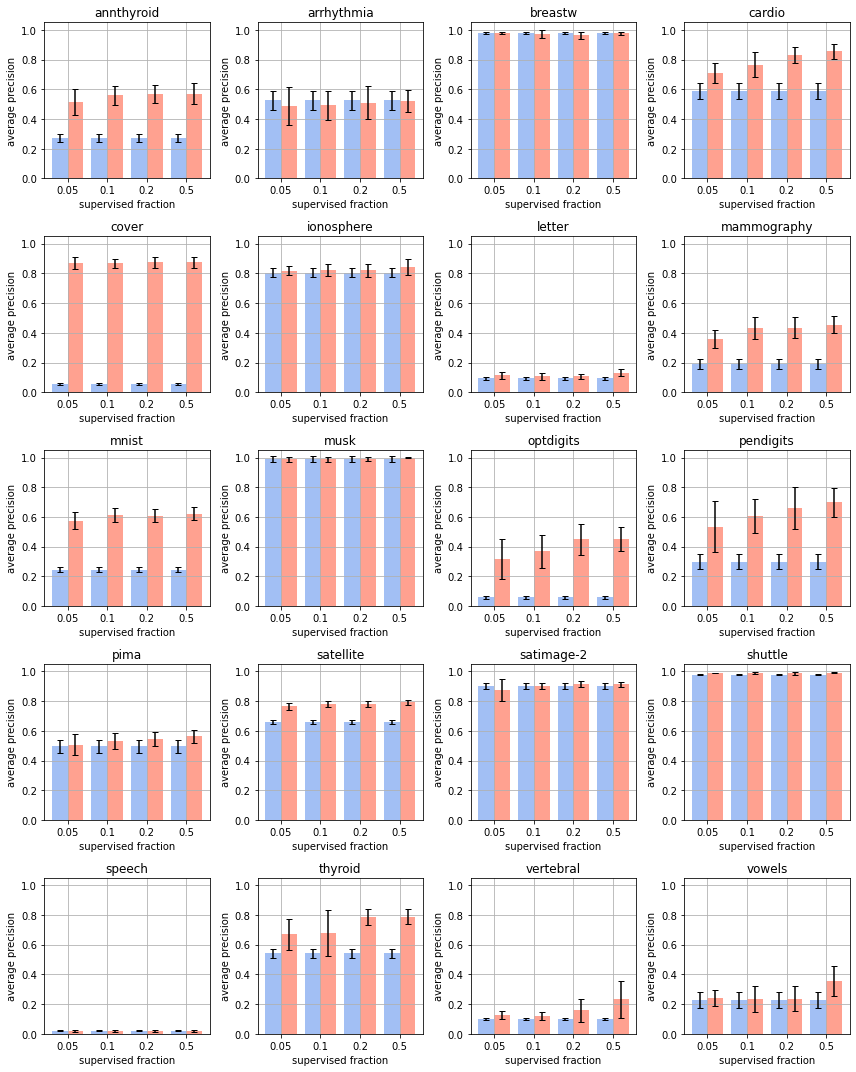

In [3]:
fig,axs = plt.subplots(5,4,figsize=[3*4,3*5])
axs = axs.flatten()

for i,name in enumerate(df['dataset'].unique()):
    selected_mean = mean[mean['dataset']==name].sort_values('supervised_size')
    selected_std  = std[std['dataset']==name].sort_values('supervised_size')

    labels = selected_mean['supervised_size']
    axs[i].bar([0.1,2.1,4.1,6.1],selected_mean['last_test'],0.8,alpha=0.6,yerr=selected_std['last_test'],label='standard forest',color='cornflowerblue',error_kw=dict(uplims=False, lolims=False, capsize=3))
    axs[i].bar([0.9,2.9,4.9,6.9],selected_mean['test_on_argmax_supervised'],0.8,alpha=0.6,yerr=selected_std['test_on_argmax_supervised'],label='reduced forest',color='tomato',error_kw=dict(uplims=False, lolims=False, capsize=3))
    
    axs[i].set_xticks([0.5,2.5,4.5,6.5])
    axs[i].set_xticklabels(labels)
    axs[i].set_xlabel('supervised fraction');axs[i].set_ylabel('average precision')
    axs[i].grid(True);axs[i].set_ylim([0,1.05]);axs[i].set_title(name)
    
    plt.tight_layout()

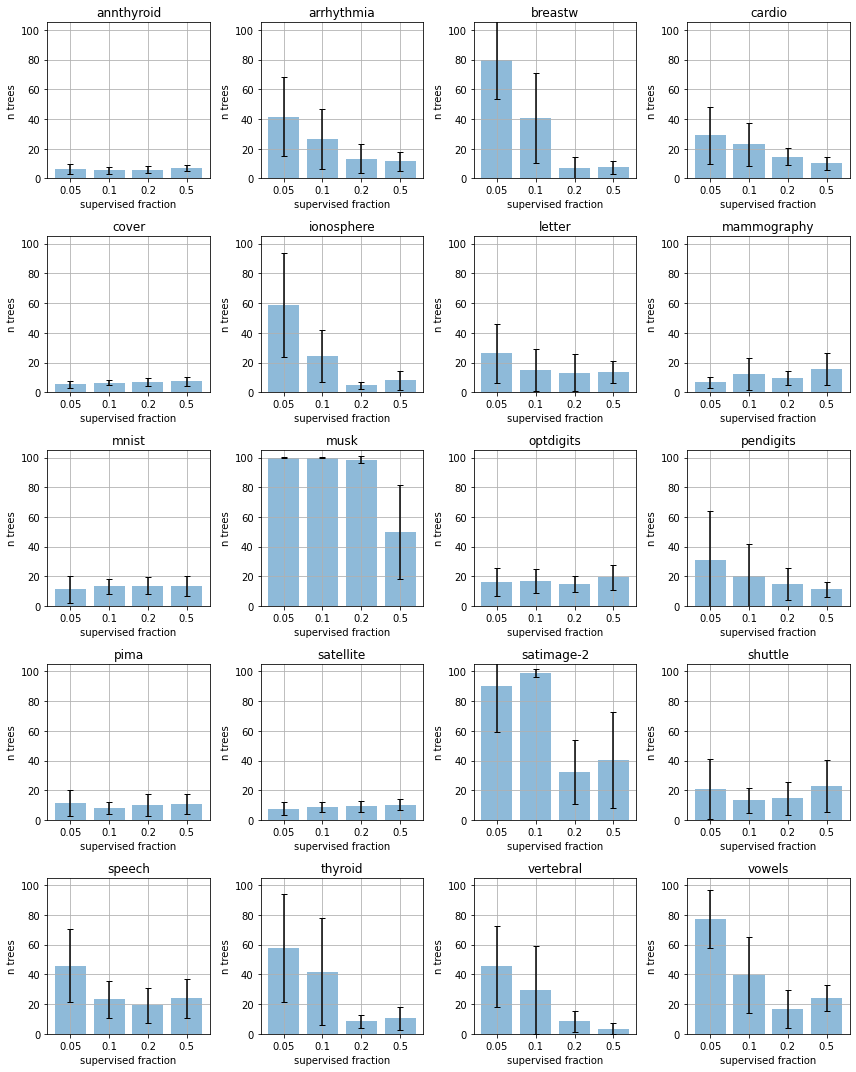

In [4]:
fig,axs = plt.subplots(5,4,figsize=[3*4,3*5])
axs = axs.flatten()

for i,name in enumerate(np.unique(mean['dataset'])):
    selected_mean = mean[mean['dataset']==name].sort_values('supervised_size')
    selected_std  = std[std['dataset']==name].sort_values('supervised_size')

    labels = selected_mean['supervised_size']
    axs[i].bar([0,1,2,3],selected_mean['argmax_supervised']+1,0.8,alpha=0.5,yerr=selected_std['argmax_supervised'],error_kw=dict(uplims=False, lolims=False, capsize=3))
    
    axs[i].set_xticks([0,1,2,3])
    axs[i].set_xticklabels(labels)
    axs[i].set_xlabel('supervised fraction');axs[i].set_ylabel('n trees')
    axs[i].grid(True);axs[i].set_ylim([0,105]);axs[i].set_title(name)
    
plt.tight_layout()